Team info:

  Project name: Earthquake Prediction

  Team name: G3

  Team member names: 

  Zachary Ruttle   PIDs: zruttlemoths

  Zi Huang         PIDS: zih19

  Qiyuan Shi       PIDS: sqiyuan2
  
  Neehar Chadeva   PIDS: neeharchadeva

# **Introduction**:

Earthquakes are one of the natural disasters that people experience and fear. If the magnitude of the earthquake is higher than 7.0, the earthquake will be regarded to be so devastating that the houses, as well as the constructions around the houses, can collapse. This can result in a large number of injuries and death in the area of the earthquake. Another natural disaster, the tsunami, could also hit a population that has recently experienced an earthquake creating a situation where much of the population could once again experience trauma. In the United States, San Francisco experienced an earthquake in 1906 with a magnitude of 6.9 that was so shocking that more than 3,000 people were dead and over 80 percent of the city in San Francisco was destroyed. Meanwhile, in Japan, the most notorious earthquake people might remember was Fukushima earthquake in 2011 that reached a massive magnitude of 9.0. If that was not enough, Fukushima also triggered a 23-feet tsunami that ultimately killed 18,000 people, injured 6,000 people, and displaced tens of thousands.

In order to reduce the number of people that could potentially get injured, or even die during an earthquake, the question we plan to address is whether it is possible to predict the location and time of the next major earthquake. Based on recent earthquake data on a sample, we plan to address the question of where the earthquake epicenters are most likely to occur and how strong they tend to be. We want to use this data to determine patterns and find out where the next earthquake is going to occur. Thus, we will satisfy the question of when, where, and how powerful present and future earthquakes are in this research. We intend to provide these answers and a possible algorithm based on this data where the next earthquake will strike and when.

The source of the data our group decides to make use of is a csv file named earthquakes.csv. The whole csv file is referenced from the website https://corgis-edu.github.io/corgis/csv/earthquakes/ and it contains any information relevant to the question we are attempting to address. There are 10 columns in the whole data set that we are required to analyze each earthquake elaborately: (1)id, (2)gap, (3)magnitude, (4)significance, (5)depth, (6)distance, (7)latitude, (8)longitude, (9)location, and (10)time.

Where will the next Earthquakes happen? The Earth is composed of many plates that are floating on a softer mantle that moves quite often, and due to the plates being uneven in many places, there are times where they can get caught on each other. When parts of these plates eventually have enough strain, they could suddenly move after getting caught on another plate and create earthquakes. Earthquakes are phenomena that happen much more often than we think, occurring as many as several times in a day, though much of them are of such low magnitudes that we don't feel them. However, many countries are in a position where these earthquakes can affect them greatly, not just for the damages but the tsunamis that can occur after them. Thus, we want to answer if there is a way to predict, based on previous data for earthquakes, where and when the next "big one" is going to happen?

We must define the earthquakes in terms of data provided which means that there is information given that we will have to parse. This includes the time they occurred for which we will use the date for simplicity, as well as the latitude and longitude (vertical and horizontal positions respectively), and finally the magnitude. The best way to figure this out in the first iteration will be to determine the areas where these earthquakes have happened the most, group them into where they occur, and at the very least try to get a regression of what the area and magnitude could be. With enough prediction, it may even be possible to also determine the date in which it will occur.

We believe that this is the best suited method for the data since it purely provides the earthquake location and magnitude. Under the belief, in most cases, that large magnitude earthquakes will happen rarely, the data should predict only on a rare occasion that the next large one will happen. However it is possible that it may create some varied predictions and data.
We begin this process by importing everything we need and the data is read into data called "earthquake".


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 343 kB/s 
     |████████████████████████████████| 6.3 MB 56.6 MB/s 


In [ ]:
#import os
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as mping
from sklearn.linear_model import LinearRegression
import sklearn.metrics.pairwise
import sklearn.cluster
import plotly.express as px
import geopandas as gpd
import geopy.distance

# the total earthquake data
earthquake = pandas.read_csv("earthquakes.csv")

# the data that contains the population density, the longitude, and 
# the population in the U.S..

pop = pandas.read_csv('world.csv')
popusmid = pandas.read_csv('usmid.csv')
popuswest = pandas.read_csv('uswest.csv')
popussouth = pandas.read_csv('ussouth.csv')
popusnorth = pandas.read_csv('usnorth.csv')
#pwd

# **Questions**
We realized that our question in the Introduction is relatively broad so we divided it into several small questions that can assist our analysis of earthquake prediction: (1) Does there exist any relationship between the longitude and the latitude of the earthquake? (2) Where are the earthquakes mainly distributed? (3) How many clusters can be formed among the earthquakes that occur all over the world? (4) How can we relate time to the occurrences of earthquakes? (5) Finally, can we use this to make a prediction of time and location?

## **Question 1**
What is the relationship between the longitude and the latitude of the earthquake?

### **Analysis 1**
To indicate what both the longitude and the latitude of the earthquake look like, the most suitable technique we decided to use is called Linear Regression, particularly  Simple Linear Regression. The reason is that there is only one independent variable and one dependent variable taken into account. 

### **Data**
The first step we have to do is to obtain the data online. Once the data is imported, it's imperative that the data is cleaned for our purposes first. We will take the information we need, and if necessary we will turn it to the right values of integers or floats, as well as managing strings, to make a DataFrame. This will be imperative as we will use these values for linear regression coefficients.



In [ ]:
# Everything is set up properly.
column = ["ID", "Longitude", "Latitude", "Magnitude", "Depth", "Time"]
target = pandas.DataFrame(columns = column)
target.ID = earthquake['id']
target.Longitude = earthquake['location.longitude']
target.Latitude = earthquake['location.latitude']
target.Magnitude = earthquake['impact.magnitude']
target.Depth = earthquake['location.depth']
target.Time = earthquake['time.epoch']
target

,ID,Longitude,Latitude,Magnitude,Depth,Time
0,nc72666881,-121.619000,37.672333,1.43,15.12,1469593183550
1,us20006i0y,94.572100,21.514600,4.90,97.07,1469593228220
2,nc72666891,-118.859167,37.576500,0.06,4.39,1469593897150
3,nc72666896,-118.994833,37.595833,0.40,1.09,1469594144150
4,nn00553447,-119.845000,39.377500,0.30,7.60,1469594519667
...,...,...,...,...,...,...
8389,nc72685246,-121.099831,36.515499,2.42,4.85,1472181541970
8390,ak13879193,-149.862700,61.498400,1.40,50.00,1472181558000
8391,nc72685251,-122.821503,38.805000,1.06,1.73,1472182205600
8392,ci37672328,-118.635333,34.308000,1.55,29.25,1472182571880


To better understand our project, what we should do is divide the whole dataset with respect to the magnitude. If the magnitude is greater than 5.0, it will be regarded as an earthquake that poses a danger to the population. Otherwise, it can be viewed as an earthquake with minor damage.

Therefore, what we need to do is to list out earthquakes that are greater than 5.0 to focus on earthquakes that destroyed constructions and houses and clean the data from earthquakes that are less than 5.0.


In [ ]:
big_magnitude_earthquake = target[target['Magnitude'] >= 5.0]
small_magnitude_earthquake = target[target['Magnitude'] < 5.0]
big_magnitude_earthquake

,ID,Longitude,Latitude,Magnitude,Depth,Time
30,us20006i18,-67.8647,-24.2860,5.6,98.84,1469601825710
114,us20006i35,140.7568,36.4922,5.3,46.00,1469630837010
421,us1000683b,-172.5158,-16.8242,5.1,5.12,1469720661700
632,us100068b1,123.4162,0.0756,5.4,143.78,1469780966340
641,us100068ba,107.0091,-9.5253,5.0,10.00,1469783230820
...,...,...,...,...,...,...
7926,us10006g7w,13.1257,42.8223,5.5,10.00,1472006010640
8002,us10006gbf,94.5789,20.9192,6.8,84.07,1472034895000
8029,us10006gf0,100.0549,-2.9567,5.8,17.15,1472046524380
8031,us10006gfa,168.9981,-22.0454,5.0,10.00,1472048301350


### **Linear Regression**
After processing data in the csv file, the next step we need to take is to adopt an analysis named Linear Regression to determine whether the exact location of both the longitude and the latitude indeed results in the occurrance of the earthquake. 

In [ ]:
lm = LinearRegression().fit(target[['Longitude']], target.Latitude)
m = lm.coef_[0]
c = lm.intercept_
tuple = (m, c)
tuple

(-0.14659681577395103, 23.314124517887652)

In [ ]:


# Compute the linear regression coefficients including the coefficient and the intercept
r = target.Longitude.corr(target.Latitude)
r

-0.5013514344968406

### **Conclusion1**
The main portion of part 1 is to basically illustrate the overall trend between the longitude and the latitude of the earthquake. The value we got for r is -0.5 and this indicates that there is a negative correlation and that it isn’t very strong. Thus, it can be determined that the relationship between the longitude and the latitude with respect to the data as a whole is not that obvious to explore. Thus, we are allowed to investigate more to identify the main traits of earthquakes. 

## **Question 2**
What are the impact and distribution of the earthquakes?

### **Analysis 2**
To determine the distribution of earthquakes, the most important thing we have to do so is to make use of the longitude and the latitude of each earthquake, as well as the depth of the impact, to visualize which continents are more likely to occur earthquake. At the same time, based upon the geographical knowledge obtained from middle schools and high schools, we can pay attention to the map to verify whether or not the earthquakes that are mainly distributed are actually located at the fault zones. When we obtain the earthquake level higher than 5.0, we may need to find population density of the nearby location, to better understand the impact of earthquake.

### **Map**
Once the information has been handled and a linear regression is generally made, now a visualization can be created with this in mind to see what all the points on the map look like of population density and earthquake point.

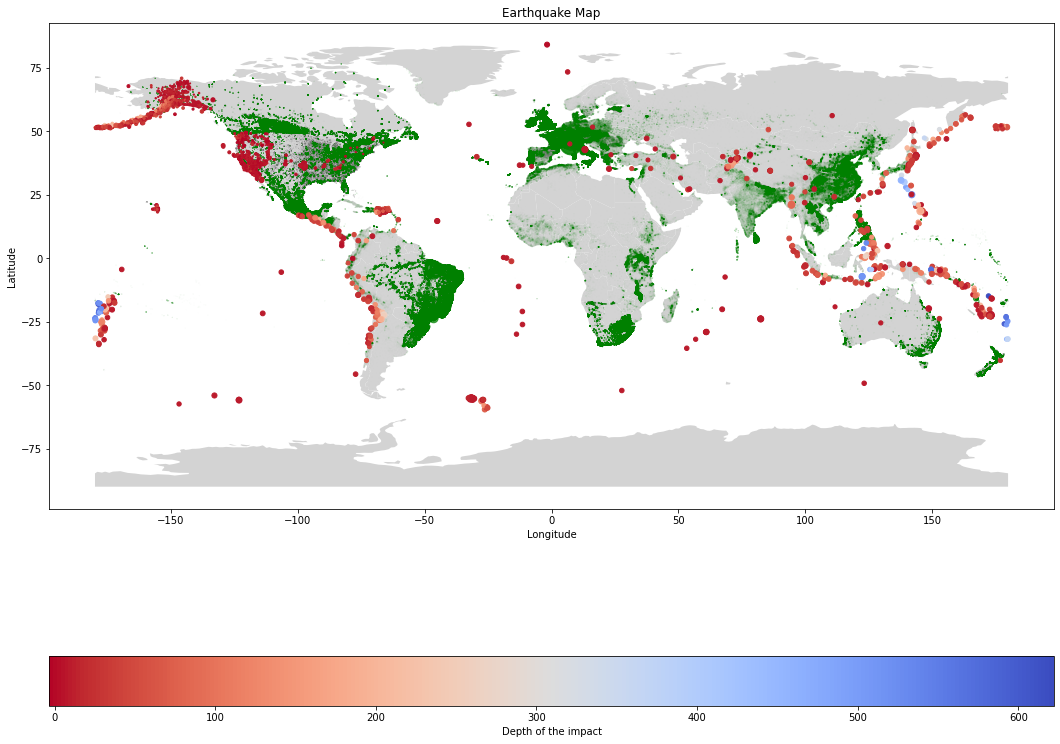

In [ ]:
# Get data from geopandas library
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Draw world map
fig, ax = plt.subplots(figsize = (18, 18))
world.plot(ax = ax, color="lightgrey")

# Extract the longitude, latitude, magnitude, depth from source file
longitudeVal = target['Longitude']
latitudeVal = target['Latitude']
magnitude = target['Magnitude']
depth = target['Depth']

# Extract the longitude, latitude, population data from source file
poplong = pop['long']
poplat = pop['lat']
population = pop['pop']

usmidlong = popusmid['long']
usmidlat = popusmid['lat']
usmidpop = popusmid['pop']

uswestlong = popuswest['long']
uswestlat = popuswest['lat']
uswestpop = popuswest['pop']

ussouthlong = popussouth['long']
ussouthlat = popussouth['lat']
ussouthpop = popussouth['pop']

usnorthlong = popusnorth['long']
usnorthlat = popusnorth['lat']
usnorthpop = popusnorth['pop']

# Plot the extracted data on world map
# The colorbar shows the distance of depth, deep red means close to ground, also means more severe
# The green dots show the population density of the related longitude and latitude
# The population should divided by factor to generate dot size fit the world map
plt.scatter(poplat, poplong, s=(population/100000), c='g', alpha=0.7)
plt.scatter(usmidlat, usmidlong, s=(usmidpop/10000000000), c='g', alpha=0.7)
plt.scatter(uswestlat, uswestlong, s=(uswestpop/10000000000), c='g', alpha=0.7)
plt.scatter(ussouthlat, ussouthlong, s=(ussouthpop/10000000000), c='g', alpha=0.7)
plt.scatter(usnorthlat, usnorthlong, s=(usnorthpop/10000000000), c='g', alpha=0.7)

# Use coolwarm colorbar to show the distance of earthquake to ground
plt.scatter(longitudeVal, latitudeVal,s=magnitude**2, c=depth, cmap=plt.cm.coolwarm_r, vmin=depth.min(), vmax=depth.max(), alpha=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake Map")
plt.colorbar(label="Depth of the impact", orientation="horizontal")
plt.show()

At this time, we've already plot the earthquake points and population density points, we may find the earthquake magnitude higher than 5.0 and identify the poplution which are affected by earthquake.

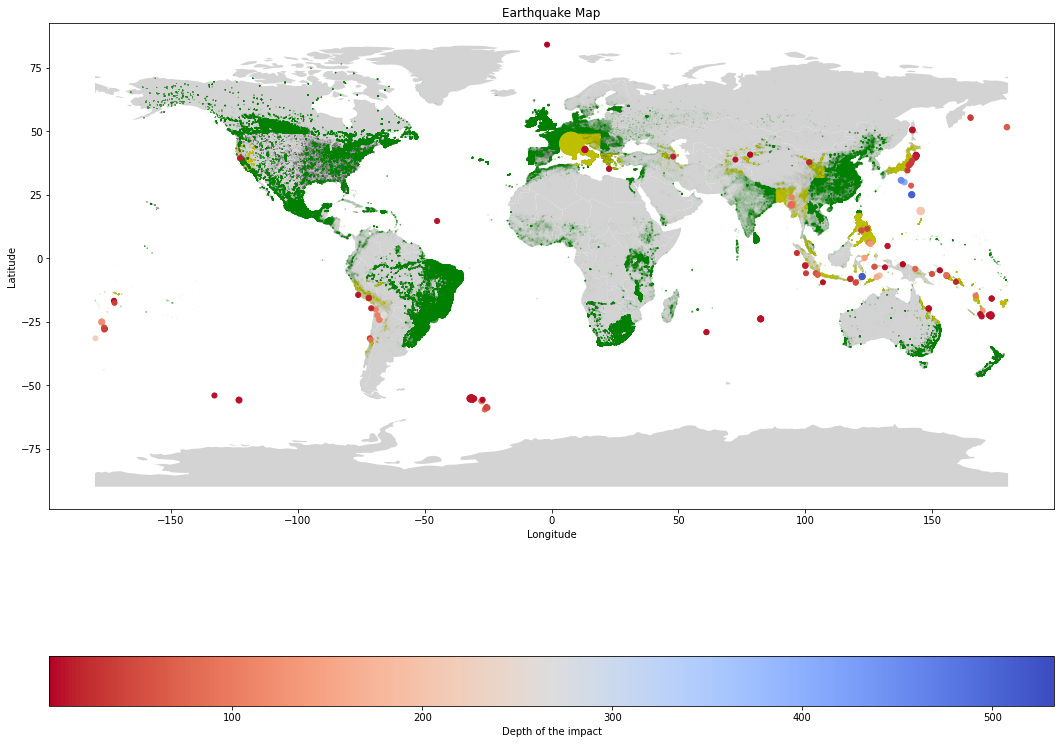

In [ ]:
# Get data from geopandas library
world2 = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Draw the world map according to the geopanda above
fig2, ax2 = plt.subplots(figsize = (18, 18))
world2.plot(ax = ax2, color = "lightgrey")

# We only concentrate on earthquakes that encompass a magnitude higher than or
# equal to 5.0
longitudeValBig = big_magnitude_earthquake['Longitude']
latitudeValBig = big_magnitude_earthquake['Latitude']
MagnitudeBig = big_magnitude_earthquake['Magnitude']
DepthBig = big_magnitude_earthquake['Depth']

eqlong = list(longitudeValBig)
eqlat = list(latitudeValBig)
eqlongMax = [x+6 for x in eqlong]
eqlongMin = [x-6 for x in eqlong]
eqlatMax = [y+6 for y in eqlat]
eqlatMin = [y-6 for y in eqlat]

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)


# Define relationship between magnitude and depth, smaller value means less impact
factorDepthMag = (MagnitudeBig / DepthBig)

# At the same time, we are required to process the datasets regarding the 
# longitude, latitude, and the popualtion density in the world and in the U.S.

# the longitude, latitude, and the population density in the world
poplog2 = pop['long']
poplat2 = pop['lat']
population2 = pop['pop']

poplonglist = list(poplog2)
poplatlist = list(poplat2)
poplist = list(population2)

poplonginrange = []
poplatinrange = []
popopt = []
for i in range(len(poplonglist)):
  for j in range(len(eqlong)):
    if poplonglist[i] < eqlatMax[j] and poplatlist[i] < eqlongMax[j] and poplonglist[i] > eqlatMin[j] and poplatlist[i] > eqlongMin[j]:
      poplonginrange.append(poplonglist[i])
      poplatinrange.append(poplatlist[i])
      popopt.append(poplist[i]/100000)

# the longitude, latitude, and the population density in the middle states in 
# the U.S.
usmidlog2 = popusmid['long']
usmidlat2 = popusmid['lat']
usmidpop2 = popusmid['pop']

umidlonglist = list(usmidlog2)
umidlatlist = list(usmidlat2)
umidlist = list(usmidpop2)

umidlonginrange = []
umidlatinrange = []
umidopt = []
for i in range(len(umidlonglist)):
  for j in range(len(eqlong)):
    if umidlonglist[i] < eqlatMax[j] and umidlatlist[i] < eqlongMax[j] and umidlonglist[i] > eqlatMin[j] and umidlatlist[i] > eqlongMin[j]:
      umidlonginrange.append(umidlonglist[i])
      umidlatinrange.append(umidlatlist[i])
      umidopt.append(umidlist[i]/10000000000)

# the longitude, latitude, and the population density in the western states in 
# the U.S.
uswestlog2 = popuswest['long']
uswestlat2 = popuswest['lat']
uswestpop2 = popuswest['pop']

uwestlonglist = list(uswestlog2)
uwestlatlist = list(uswestlat2)
uwestlist = list(uswestpop2)

uwestlonginrange = []
uwestlatinrange = []
uwestopt = []
for i in range(len(uwestlonglist)):
  for j in range(len(eqlong)):
    if uwestlonglist[i] < eqlatMax[j] and uwestlatlist[i] < eqlongMax[j] and uwestlonglist[i] > eqlatMin[j] and uwestlatlist[i] > eqlongMin[j]:
      uwestlonginrange.append(uwestlonglist[i])
      uwestlatinrange.append(uwestlatlist[i])
      uwestopt.append(uwestlist[i]/10000000000)

# the longitude, latitude, and the population density in the southern states in 
# the U.S.
ussouthlog2 = popussouth['long']
ussouthlat2 = popussouth['lat']
ussouthpop2 = popussouth['pop']

usouthlonglist = list(ussouthlog2)
usouthlatlist = list(ussouthlat2)
usouthlist = list(ussouthpop2)

usouthlonginrange = []
usouthlatinrange = []
usouthopt = []
for i in range(len(usouthlonglist)):
  for j in range(len(eqlong)):
    if usouthlonglist[i] < eqlatMax[j] and usouthlatlist[i] < eqlongMax[j] and usouthlonglist[i] > eqlatMin[j] and usouthlatlist[i] > eqlongMin[j]:
      usouthlonginrange.append(usouthlonglist[i])
      usouthlatinrange.append(usouthlatlist[i])
      usouthopt.append(usouthlist[i]/10000000000)

# The longitude, latitude, and the population density in the northern states in
# the U.S.
usnorthlog2 = popusnorth['long']
usnorthlat2 = popusnorth['lat']
usnorthpop2 = popusnorth['pop']

unorthlonglist = list(usnorthlog2)
unorthlatlist = list(usnorthlat2)
unorthlist = list(usnorthpop2)

unorthlonginrange = []
unorthlatinrange = []
unorthopt = []
for i in range(len(unorthlonglist)):
  for j in range(len(eqlong)):
    if unorthlonglist[i] < eqlatMax[j] and unorthlatlist[i] < eqlongMax[j] and unorthlonglist[i] > eqlatMin[j] and unorthlatlist[i] > eqlongMin[j]:
      unorthlonginrange.append(unorthlonglist[i])
      unorthlatinrange.append(unorthlatlist[i])
      unorthopt.append(unorthlist[i]/10000000000)

# Later, we are going to create a scatterplot for each region.
plt.scatter(poplat2, poplog2, s=(population2/100000), c='g', alpha=0.7)
plt.scatter(usmidlat2, usmidlog2, s=(usmidpop2/10000000000), c='g', alpha=0.7)
plt.scatter(uswestlat2, uswestlog2, s=(uswestpop2/10000000000), c='g', alpha=0.7)
plt.scatter(ussouthlat2, ussouthlog2, s=(ussouthpop2/10000000000), c='g', alpha=0.7)
plt.scatter(usnorthlat2, usnorthlog2, s=(usnorthpop2/10000000000), c='g', alpha=0.7)

plt.scatter(poplatinrange, poplonginrange, s=popopt, c='y', alpha=1)
plt.scatter(umidlatinrange, umidlonginrange, s=umidopt, c='y', alpha=1)
plt.scatter(uwestlatinrange, uwestlonginrange, s=uwestopt, c='y', alpha=1)
plt.scatter(usouthlatinrange, usouthlonginrange, s=usouthopt, c='y', alpha=1)
plt.scatter(unorthlatinrange, unorthlonginrange, s=unorthopt, c='y', alpha=1)

# At the same time, similar to the technique above, we can display the distance 
# of earthquake to ground.
plt.scatter(longitudeValBig, latitudeValBig, s=MagnitudeBig**2, c=DepthBig, cmap=plt.cm.coolwarm_r, 
            vmin=DepthBig.min(), vmax = DepthBig.max(), alpha=1)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake Map")
plt.colorbar(label="Depth of the impact", orientation="horizontal")
plt.show()

Meanwhile, the smaller level earthquakes which will not affect human are plotted on the world map.

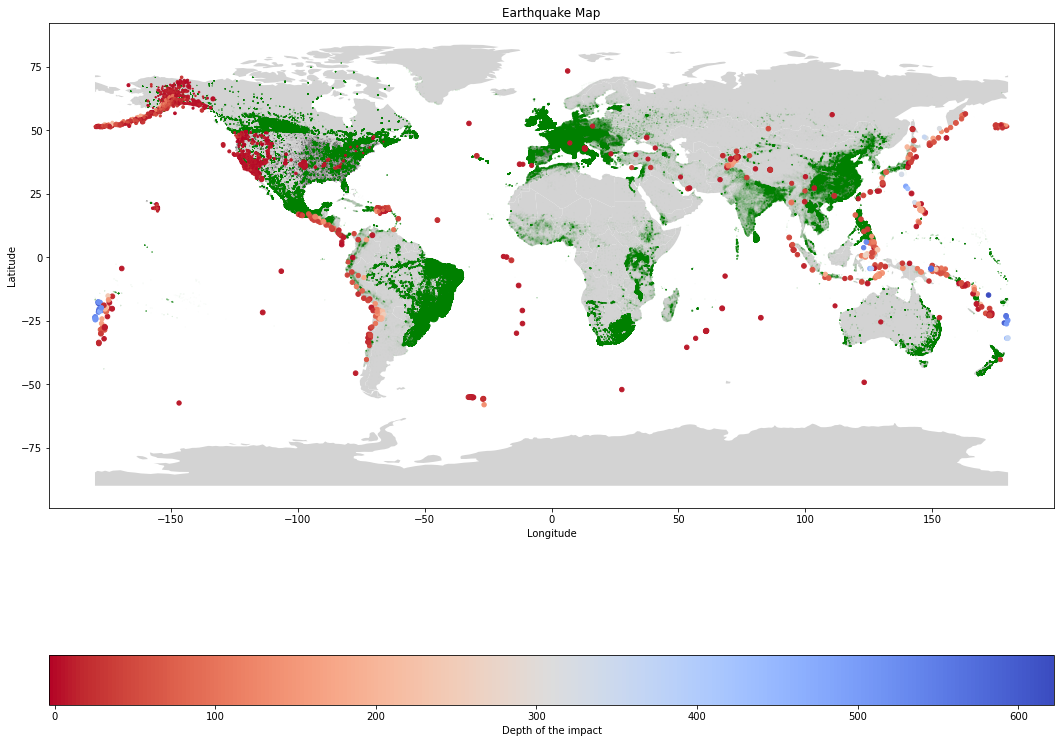

In [ ]:
# Get data from geopandas library
world3 = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Draw the world map according to the geopanda above
fig3, ax3 = plt.subplots(figsize = (18, 18))
world3.plot(ax = ax3, color = "lightgrey")

# We only concentrate on earthquakes that encompass a magnitude higher than or
# equal to 5.0
longitudeValSmall = small_magnitude_earthquake['Longitude']
latitudeValSmall = small_magnitude_earthquake['Latitude']
MagnitudeSmall = small_magnitude_earthquake['Magnitude']
DepthSmall = small_magnitude_earthquake['Depth']

# At the same time, we are required to process the datasets regarding the 
# longitude, latitude, and the popualtion density in the world and in the U.S.

# the longitude, latitude, and the population density in the world
poplog3 = pop['long']
poplat3 = pop['lat']
population3 = pop['pop']

# the longitude, latitude, and the population density in the middle states in 
# the U.S.
usmidlog3 = popusmid['long']
usmidlat3 = popusmid['lat']
usmidpop3 = popusmid['pop']

# the longitude, latitude, and the population density in the western states in 
# the U.S.
uswestlog3 = popuswest['long']
uswestlat3 = popuswest['lat']
uswestpop3 = popuswest['pop']

# the longitude, latitude, and the population density in the southern states in 
# the U.S.
ussouthlog3 = popussouth['long']
ussouthlat3 = popussouth['lat']
ussouthpop3 = popussouth['pop']

# The longitude, latitude, and the population density in the northern states in
# the U.S.
usnorthlog3 = popusnorth['long']
usnorthlat3 = popusnorth['lat']
usnorthpop3 = popusnorth['pop']

# Later, we are going to create a scatterplot for each region.
plt.scatter(poplat3, poplog3, s=(population2/100000), c='g', alpha=0.7)
plt.scatter(usmidlat3, usmidlog3, s=(usmidpop2/10000000000), c='g', alpha=0.7)
plt.scatter(uswestlat3, uswestlog3, s=(uswestpop2/10000000000), c='g', alpha=0.7)
plt.scatter(ussouthlat3, ussouthlog3, s=(ussouthpop2/10000000000), c='g', alpha=0.7)
plt.scatter(usnorthlat3, usnorthlog3, s=(usnorthpop2/10000000000), c='g', alpha=0.7)

# At the same time, similar to the technique above, we can display the distance 
# of earthquake to ground.
plt.scatter(longitudeValSmall, latitudeValSmall, s=MagnitudeSmall**2, c=DepthSmall, cmap=plt.cm.coolwarm_r, 
            vmin=DepthSmall.min(), vmax = DepthSmall.max(), alpha=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake Map")
plt.colorbar(label="Depth of the impact", orientation="horizontal")
plt.show()

Finally, after briefly overviewing the distribution of earthquakes in the world, we still have to pay attention to the distribution of earthquakes in the U.S.

Before doing so, the most crucial step we need to complete is to analyze the data with the column named location.name. More specifically, the function groupby() is encapsulated into the column location.name in earthquake.csv to notice how many groups in the column location.name in total can be formed. 

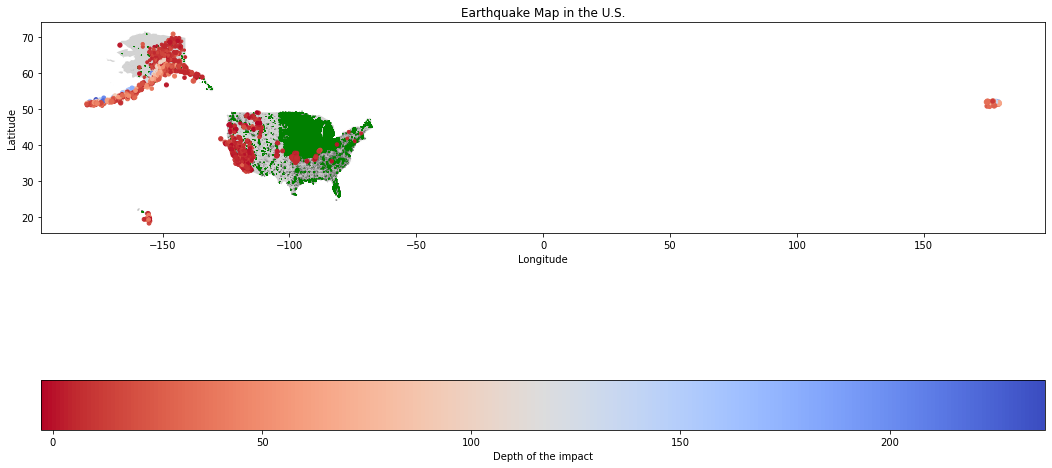

In [ ]:
#USStates = mping.imread('statesUS.png', 0)
#fig4, ax4 = plt.subplots(figsize = (100, 100))
#plt.imshow(USStates, extent = (-200, 500))
division = earthquake.groupby("location.name")
division.groups  #Alaska, Arkansas, Californina, Colorado, Georgia, Hawaii, Idaho, Illinois, Kansas, Missouri, Montana, Nevada, 
                 #New Hampshire, New Jersey, New York, North Carolina, Northern California, Ohio, Oklahoma, Oregon, Pennsylvania
US = pandas.concat([group for (name, group) in division if name in ['Alaska', 'Arkansas', 'California', 'Colorado', 'Hawaii', 'Idaho', 
                                                                    'Illinois', 'Kansas', 'Missouri', 'Montana', 
                                                                    'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina',
                                                                    'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania']])
#def_geo = gpd.GeoDataFrame(US, geometry = gpd.points_from_xy(US["location.longitude"], US["location.latitude"]))

#USMap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
#ax4 = USMap[USMap.continent == 'North America'].plot(color = 'lightgrey', figsize = (200, 20))
#def_geo.plot(ax = ax4, color = "lightgrey")
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(20, 200)
#fig4, ax4 = plt.subplots(figsize = (12, 12))
#USMap.plot(ax = ax4, color = "lightgrey")

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
usmap = worldmap.loc[worldmap['name'] == 'United States of America']
fig4, ax4 = plt.subplots(figsize = (18, 18))
usmap.plot(ax = ax4, color = "lightgrey")

# We need to figure out what the range of the longitude and the latitude of the map looks like.




longitudeValUS = US['location.longitude']
latitudeValUS = US['location.latitude']
MagnitudeUS = US['impact.magnitude']
DepthUS = US['location.depth']

usmidlog4 = popusmid['long']
usmidlat4 = popusmid['lat']
usmidpop4 = popusmid['pop']

uswestlog4 = popuswest['long']
uswestlat4 = popuswest['lat']
uswestpop4 = popuswest['pop']

ussouthlog4 = popussouth['long']
ussouthlat4 = popussouth['lat']
ussouthpop4 = popussouth['pop']

usnorthlog4 = popusnorth['long']
usnorthlat4 = popusnorth['lat']
usnorthpop4 = popusnorth['pop']


plt.scatter(usmidlat4, usmidlog4, s=(usmidpop4/100000), c='g', alpha=0.7)
plt.scatter(uswestlat4, uswestlog4, s=(uswestpop4/10000000000), c='g', alpha=0.7)
plt.scatter(ussouthlat4, ussouthlog4, s=(ussouthpop4/10000000000), c='g', alpha=0.7)
plt.scatter(usnorthlat4, usnorthlog4, s=(usnorthpop4/1000000000000), c='g', alpha=0.7)

plt.scatter(longitudeValUS, latitudeValUS, s=MagnitudeUS*6, c=DepthUS, cmap=plt.cm.coolwarm_r, 
            vmin=DepthUS.min(), vmax = DepthUS.max(), alpha=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake Map in the U.S.")
plt.colorbar(label="Depth of the impact", orientation="horizontal")
plt.show()

### **Conclusion 2**
After the creation of the Earthquake Map, we can determine that the main distribution of earthquakes are almost the same as expected. The regions that occur earthquake easily are referred to places including the western coast in the U.S, such as California and San Francisco, the boundary between Cananda and the U.S., Japan, Mexico, Peru, Chile,Indonesia, Malaysia, all of which are, no surprisingly, located at each fault zone we have already studied in middle schools and high schools -- At the edge of continents. Level 5.0 or larger magnitude earthquake also happends mostly here. Meanwhile, the population density is high in the locations affected by earthquake, residents in these regions should have prevention about the earthquake. 

## **Question 3** #
How many clusters can be formed from earthquakes that occur all over the
world?

### **Analysis 3**
Even though we have already figured out the main distribution of earthquakes, our main purpose for this project is somewhat likely to predict when the next earthquake will take place. Instead of focusing on the data as a whole, we prefer to select these samples that have a magnitude higher than 5.0 to be analyzed properly.


### **Grouping**
Now to determine the number of groups that will work best to ensure the best linear regression for later tests, We will be finding the best spot with the elbow method.

In [ ]:
# After the relationship between latitude and longitude is already depicted, we would like to make use of the combination of
# k-mean clusters and normalized data to figure out this question.

# First of all, I need to change the columns in the csv file named earthquake to eliminate these categorical variables
revised = earthquake.reindex(columns=['id', 'location.full', 'location.name', 'time.full', 'time.day', 'time.hour',
                                      'time.minute', 'time.month', 'time.second', 'time.year', 'impact.gap', 'impact.magnitude',
                                      'impact.significance', 'location.depth', 'location.distance', 'location.latitude', 
                                      'location.longitude', 'time.epoch'])
quant = revised.iloc[:,10:]
norm = (quant - quant.mean()) / quant.std()

matrix = sklearn.metrics.pairwise.euclidean_distances(norm)

collection = pandas.DataFrame(matrix, index = earthquake.id, columns = earthquake.id)

collection

id,nc72666881,us20006i0y,nc72666891,nc72666896,nn00553447,ak13805337,hv61354276,ak13805339,ci37640584,nc72666901,...,ak13879180,ak13879182,ci37672280,ak13879186,ci37672304,nc72685246,ak13879193,nc72685251,ci37672328,ci37672360
id,,,,,,,,,,,,,,,,,,,,,
nc72666881,0.000000,6.212420,1.999384,0.983919,1.048668,1.696303,1.277561,1.585784,0.512165,0.495458,...,4.174501,4.179932,3.645396,4.092680,3.685226,3.826104,4.150867,3.622194,3.581472,3.613732
us20006i0y,6.212420,0.000000,7.481797,6.908327,6.930544,6.536185,6.758800,6.443182,6.462978,5.989712,...,7.888915,7.898913,7.637262,7.261522,7.429932,6.497044,7.479682,7.551947,6.952207,7.408282
nc72666891,1.999384,7.481797,0.000000,1.589089,1.680331,3.232186,2.382471,3.030982,1.602074,2.478080,...,5.006159,4.996310,3.772840,5.147971,4.303612,4.883490,5.114730,3.807091,4.235677,4.076983
nc72666896,0.983919,6.908327,1.589089,0.000000,0.211167,2.106249,1.315266,2.108375,0.810074,1.279270,...,4.189345,4.186867,3.590774,4.302720,3.658047,4.169478,4.307246,3.642976,3.762085,3.602277
nn00553447,1.048668,6.930544,1.680331,0.211167,0.000000,2.062848,1.401020,2.096194,0.957297,1.314977,...,4.130121,4.119655,3.614748,4.268082,3.653631,4.189170,4.234738,3.675088,3.770894,3.610618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nc72685246,3.826104,6.497044,4.883490,4.169478,4.189170,3.891526,4.027372,3.890197,3.976494,3.679634,...,2.237253,2.305464,2.173470,1.556846,1.591411,0.000000,2.082243,2.020845,1.259961,1.687370
ak13879193,4.150867,7.479682,5.114730,4.307246,4.234738,3.751521,4.490669,3.882807,4.382284,4.029031,...,0.977326,0.852586,2.655285,1.029564,1.965425,2.082243,0.000000,2.609767,2.053932,2.205204
nc72685251,3.622194,7.551947,3.807091,3.642976,3.675088,4.104606,3.845459,4.018648,3.566439,3.733736,...,2.505204,2.521555,0.375767,2.499156,1.314668,2.020845,2.609767,0.000000,1.076518,0.878494


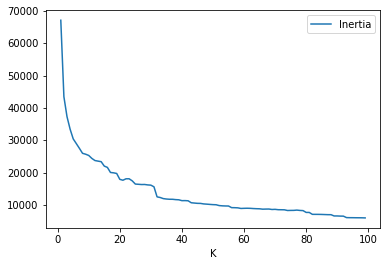

In [ ]:
# Later, we need to conduct an elbow analysis to choose the most suitable group of clusters.
accumulator=[]
km = 0
for rand in range(1, 100):
    km = sklearn.cluster.KMeans(n_init = 1, max_iter = 10, init = norm.iloc[0:rand], n_clusters = rand)
    km.fit_predict(norm)
    accumulator.append(km.inertia_)
summarization = pandas.DataFrame(accumulator, columns = ['Inertia'])
summarization['K'] = range(1, 100)

summarization = summarization.reindex(columns=['K', 'Inertia'])

summarization
summarization.plot.line(x='K', y='Inertia')

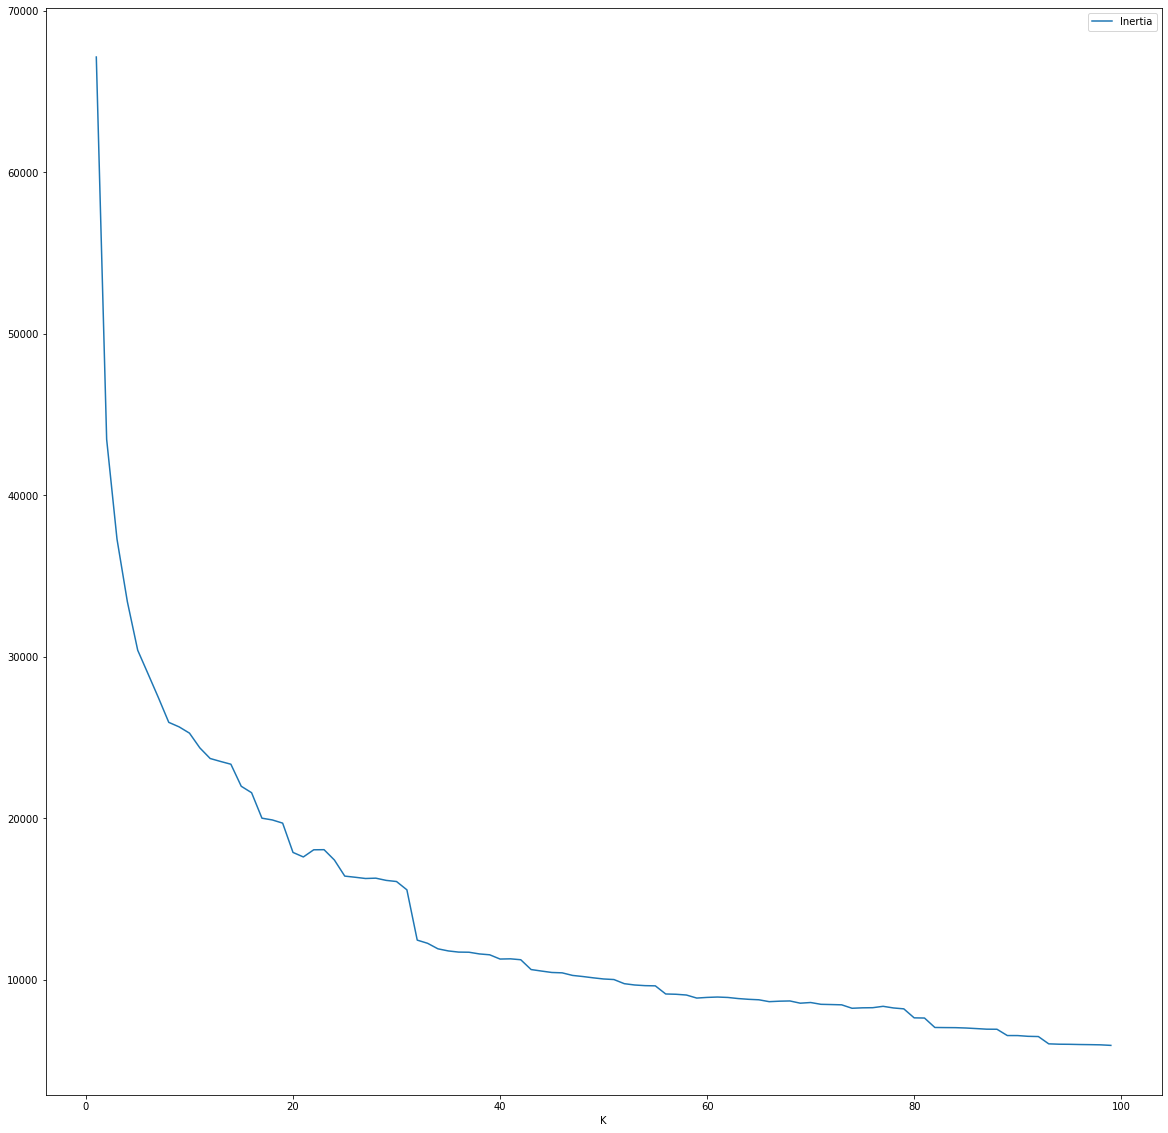

In [ ]:
summarization.plot.line(x='K', y='Inertia', figsize=(20,20))

As can be seen here, the elbow is approximately 30, leading to this being a reasonable size to use for the earthquake data. Now with this decision, the clusters can be made with this data, and it will serve as the basis for the next tests

In [ ]:
km = sklearn.cluster.KMeans(n_init = 1, max_iter = 10, init = norm.iloc[0:30], n_clusters = 30)
labels = km.fit_predict(norm)
labels = pandas.DataFrame(labels, columns=['Cluster'], index=norm.index)
groups = pandas.merge(target, labels, how='inner', left_index=True, right_index=True)
groups['Magnitude'] = target.Magnitude
groups

,ID,Longitude,Latitude,Magnitude,Depth,Time,Predicted,index,Cluster
0,nc72666881,-121.619000,37.672333,1.43,15.12,1469593183550,1.469600e+12,0,10
1,us20006i0y,94.572100,21.514600,4.90,97.07,1469593228220,1.469601e+12,1,16
2,nc72666891,-118.859167,37.576500,0.06,4.39,1469593897150,1.469601e+12,2,12
3,nc72666896,-118.994833,37.595833,0.40,1.09,1469594144150,1.469601e+12,3,14
4,nn00553447,-119.845000,39.377500,0.30,7.60,1469594519667,1.469602e+12,4,14
...,...,...,...,...,...,...,...,...,...
8389,nc72685246,-121.099831,36.515499,2.42,4.85,1472181541970,1.472212e+12,8389,28
8390,ak13879193,-149.862700,61.498400,1.40,50.00,1472181558000,1.472213e+12,8390,5
8391,nc72685251,-122.821503,38.805000,1.06,1.73,1472182205600,1.472213e+12,8391,4
8392,ci37672328,-118.635333,34.308000,1.55,29.25,1472182571880,1.472214e+12,8392,28


### **Conclusion 3**
According to the elbow method we have recently learned in class, the earthquake data in the earthquake.csv file can be clustered into 30 groups due to the fact that the scatterplot between k and the inertia value looks like a person's shoulder in which the value 30 is estimated to be a person's elbow on the shoulder. Thus, choosing the value 30 as the preferred candidate can help us make further analysis.  

## **Question 4** #

How can we relate time to the occurrences of earthquakes?

### **Analysis 4**

Fortunately for us, the information for the times an earthquake happens already exists in the data. However, we have to get it into a form that is readable instead of by dates or times alone. Therefore to start, we'll have to add the information in and then map it to a format that can be congruent to a given date. Fortunately the data set has something for this, known as epoch time.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
X = PolynomialFeatures(degree=3, include_bias=False).fit_transform(target.index.array.reshape(-1, 1))
lm = LinearRegression().fit(X, target.Time)
lm.coef_, lm.intercept_

(array([ 2.92503102e+05, -1.17423039e+01,  1.66756439e-03]),
 1469600462630.9075)

As can be found here by looking at a polynomial regression, we can find the values needed to get more and more accurate predictions as need be. Three of them will be fine for now, so let's see by looking at scatterplot for this. And, using this polynomial, we can predict the timing for the next quakes.

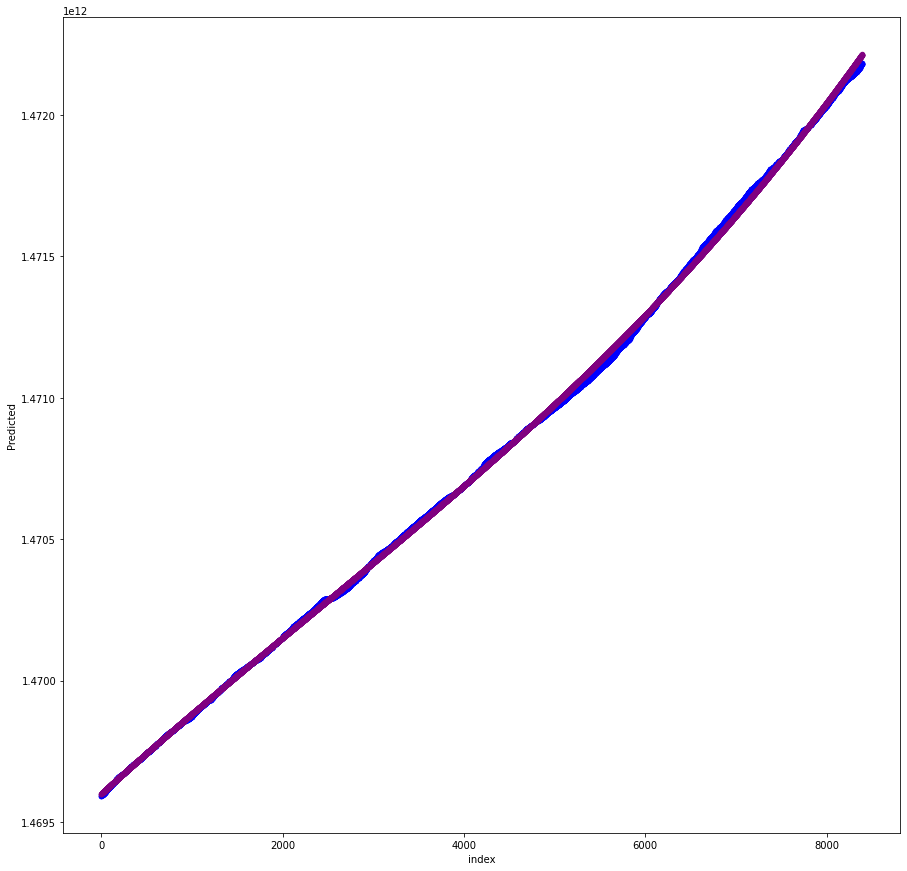

In [ ]:
target['Predicted'] = lm.predict(X)
target['index'] = target.index
ax = target.plot.scatter(x='index', y='Time', color='blue', figsize=(15, 15))
target.plot.scatter(x='index', y='Predicted', ax=ax, color='purple', figsize=(15, 15))

In [ ]:
lm.score(X, target.Time)

0.9996834751228239

### **Conclusion 4**

The usage of polynomial regression when given the basic input of time and a list of all the earthquakes allows for extrapolation of data, and by these means we can determine when the next ones will strike within an approximate area of epoch. Of course, there will need to be more filtering to perform this in such a way to determine when the next big E=earthquake will happen, and where it will happen in regards to group relation, but this method can be easily applied to either those groups or the filtered magnitude list.

## **Question 5** #

Can we predict the next time and place that an earthquake is going to happen?

### **Analysis 5**

From our work so far, we have found the distribution of the Earthquakes, a way to group them together, and a way to determine time, as well as filtering any quakes above magnitude 5.0. Now we have to determine the place that the next big earthquake will happen in a given group, hopefully the largest among them, such that we can prepare. From this point too, we can determine the other characteristics based on previous earthquakes. Let's go through the steps to finally answer the question of extrapolation.

In [ ]:
bigGroups = groups[groups.Magnitude > 5.0]
g = bigGroups.groupby('Cluster')
g.size()

Cluster
1     12
9     32
16    56
dtype: int64

Based on the size of these, we can determine the cluster to go into. We may not have as much data in these clusters, but this will make finding the results easier and a quicker build. From this the largest cluster is 16, so we'll further specify and then start the process for determining time and getting the information from them.

In [ ]:
group16 = bigGroups[bigGroups.Cluster == 16]
group16 = group16.reset_index()
group16

,level_0,ID,Longitude,Latitude,Magnitude,Depth,Time,Predicted,index,Cluster
0,114,us20006i35,140.7568,36.4922,5.3,46.00,1469630837010,1.469634e+12,114,16
1,632,us100068b1,123.4162,0.0756,5.4,143.78,1469780966340,1.469781e+12,632,16
2,799,us100068jg,145.5410,18.5439,7.7,207.62,1469827106510,1.469828e+12,799,16
3,835,us100068n4,169.9542,-20.7929,5.2,132.31,1469837505160,1.469837e+12,835,16
4,1030,us100068rp,155.7949,-6.9486,5.7,55.48,1469884750050,1.469891e+12,1030,16
5,1075,us100068tv,22.6703,35.1165,5.2,10.90,1469899580910,1.469903e+12,1075,16
6,1171,us100068wb,138.4950,-2.4471,5.2,3.93,1469927273670,1.469930e+12,1171,16
7,1449,us1000692a,117.8145,-8.1940,5.6,21.00,1470008401880,1.470005e+12,1449,16
8,1593,us1000696h,94.9407,21.2885,5.2,128.77,1470045668380,1.470043e+12,1593,16
9,2595,us10006a0c,143.4332,-4.2551,5.2,73.90,1470301281510,1.470310e+12,2595,16


Now for the process from before to determine the epoch time, we'll run the same analysis as before. This creates a grpah that we can use to predict the next time based on just the index here.

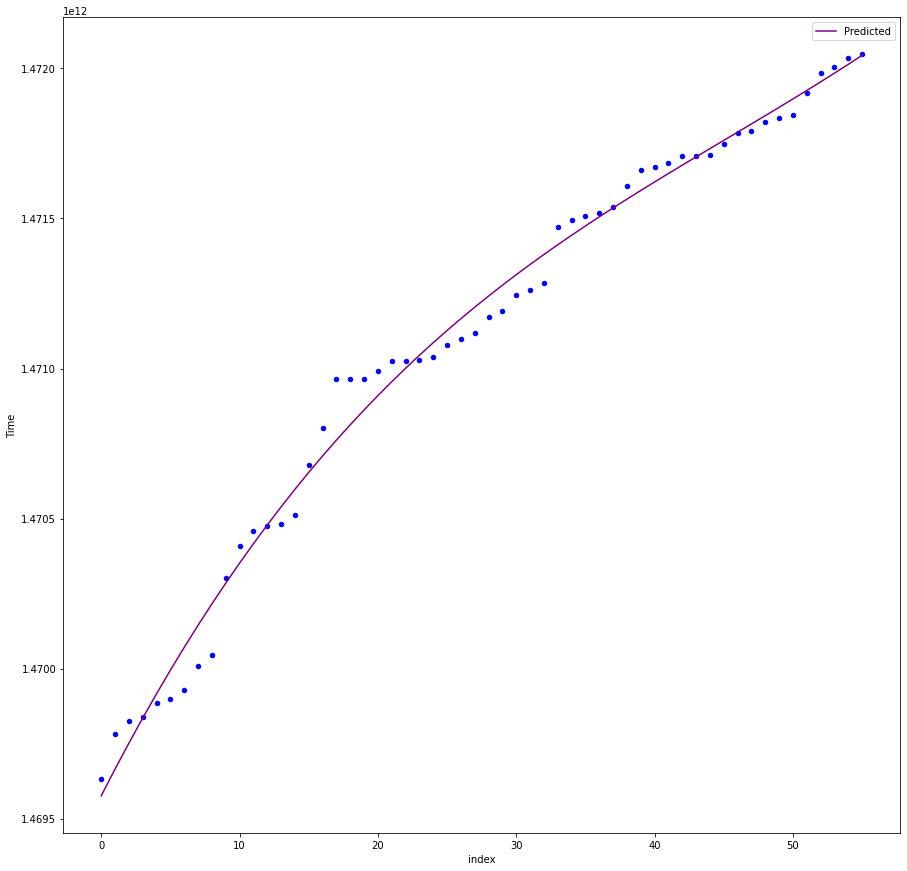

In [ ]:
X = PolynomialFeatures(degree=3, include_bias=False).fit_transform(group16.index.array.reshape(-1, 1))
lm = LinearRegression().fit(X, group16.Time)
group16['Predicted'] = lm.predict(X)
group16['index'] = group16.index
ax = group16.plot.scatter(x='index', y='Time', color='blue', figsize=(15, 15))
group16.plot.line(x='index', y='Predicted', ax=ax, color='purple', figsize=(15, 15))

In [ ]:
ts = (lm.coef_[2])*(56**3) + (lm.coef_[1])*(56**2) + lm.coef_[0]*56 + lm.intercept_
ts


1472074413850.7537

This gives an epoch time that while is very accurate, to the second, is likely to be more of a guideline. The next big earthquake in this area will take place on August 24, 2016.

With the time acquired, all we need to do now is take the information we've already got and perform some more predictions for latitude and longitude. They can be done in much the same way in regards to time, in epoch time. We can also finally put it onto a map of the world and determine the actual location of this earthquake.

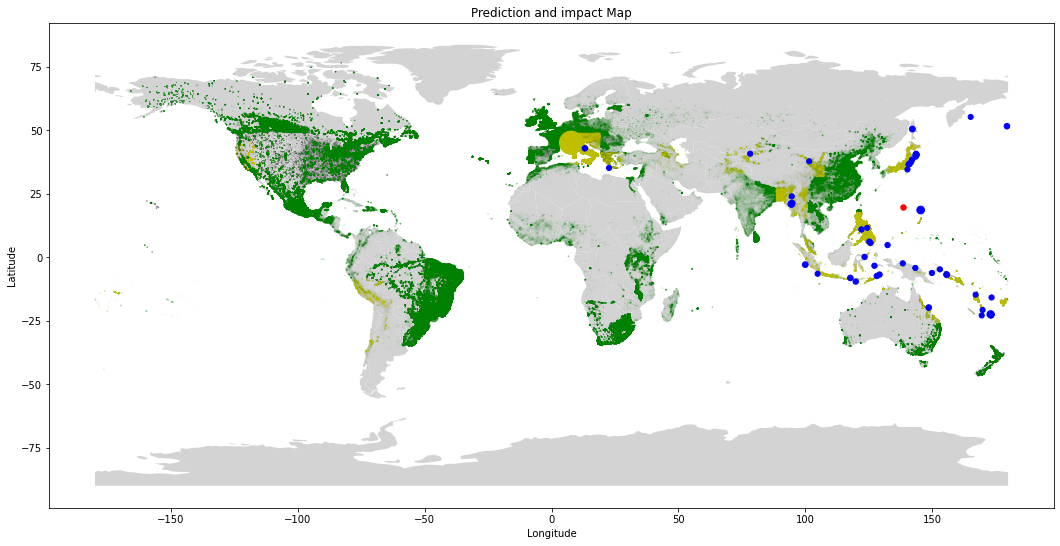

In [ ]:
worldPredict = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
figPrid, axPrid = plt.subplots(figsize = (18, 18))


lm2 = LinearRegression().fit(group16[['Time']], group16.Longitude)
lm3 = LinearRegression().fit(group16[['Time']], group16.Latitude)
lm2.coef_, lm2.intercept_, lm3.coef_, lm3.intercept_
#axSomething = group16.plot.scatter(x='Longitude', y='Latitude', color='blue', figsize=(15, 15))
point = [ts*lm2.coef_ + lm2.intercept_, ts*lm3.coef_ + lm3.intercept_]
#pointFrame = pandas.DataFrame(point).transpose()
#pointFrame
#pointFrame.plot.scatter(x=0, y=1, ax=axSomething, color='red', figsize=(15, 15))

lmPre4 = LinearRegression().fit(group16[['Time']], group16.Magnitude)
lmPre5 = LinearRegression().fit(group16[['Time']], group16.Depth)
magPre = ts*lmPre4.coef_ + lmPre4.intercept_
depPre = ts*lmPre5.coef_ + lmPre5.intercept_

worldPredict.plot(ax = axPrid, color = "lightgrey")

plt.scatter(poplat2, poplog2, s=(population2/100000), c='g', alpha=0.7)
plt.scatter(usmidlat2, usmidlog2, s=(usmidpop2/10000000000), c='g', alpha=0.7)
plt.scatter(uswestlat2, uswestlog2, s=(uswestpop2/10000000000), c='g', alpha=0.7)
plt.scatter(ussouthlat2, ussouthlog2, s=(ussouthpop2/10000000000), c='g', alpha=0.7)
plt.scatter(usnorthlat2, usnorthlog2, s=(usnorthpop2/10000000000), c='g', alpha=0.7)

plt.scatter(poplatinrange, poplonginrange, s=popopt, c='y', alpha=1)
plt.scatter(umidlatinrange, umidlonginrange, s=umidopt, c='y', alpha=1)
plt.scatter(uwestlatinrange, uwestlonginrange, s=uwestopt, c='y', alpha=1)
plt.scatter(usouthlatinrange, usouthlonginrange, s=usouthopt, c='y', alpha=1)
plt.scatter(unorthlatinrange, unorthlonginrange, s=unorthopt, c='y', alpha=1)

plt.scatter(point[0][0], point[1][0], s=magPre[0]**2, c='r', alpha=1)
plt.scatter(group16['Longitude'], group16['Latitude'], s=group16['Magnitude']**2, c='b', alpha=1)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Prediction and Impact Map")
plt.show()


In [ ]:
lm4 = LinearRegression().fit(group16[['Time']], group16.Magnitude)
lm5 = LinearRegression().fit(group16[['Time']], group16.Depth)
mag = ts*lm4.coef_ + lm4.intercept_
dep = ts*lm5.coef_ + lm5.intercept_
mag[0], dep[0]

(5.382680448430406, 28.582725398577168)

Here, we finally have our answer, of approximately 140 degrees in latitude and 20 degrees in longitude, with a magnitude of 5.38 at a depth of 28.5 kilometers. This ends up being in the middle of the ocean, so it will not be a heavy impact likely. Further extrapolation can be done with the time being determined, and then the values going further.

### **Conclusion 5**

Based on the research done here, there is a certain range that we can determine when new earthquakes will happen, though it's only within a near time frame. We can use more precise methods for determining the time and place that it will occur, especially the latter as that requires a better degree of prediction than just a linear form, though it may be the best in this case. As more data is acquired however and computers become more powerful, it will become easier to make these predictions.

#**Conclusion**

  We have conducted a thorough analysis of earthquakes in order to attempt to answer the question that was posed in the introduction. To reiterate, the question was whether we can predict the location and time of the next major earthquake. To begin, we decided to answer the question of how the latitude and longitude may affect earthquake location. The way we went about answering this question is by creating a dataframe of all the necessary data and then sorting it so that we only have the earthquake information for those that were about 5.0 in magnitude. Afterwards, we ran a linear regression and concluded that perhaps latitude and longitude were not the best indicators of the location and timing of the next probable earthquake. Next we explored the impact and distribution of the earthquakes. We have shown several maps that display the location and impact of the earthquakes that have occurred and are able to determine the areas in which people are most susceptible to being the victim of an earthquake. Unsurprisingly, these areas are mostly located around the fault lines of the tectonic plates. Afterwards, we decided to analyze the number of clusters that can be formed from the earthquakes. In order to accomplish this task we created an elbow analysis and determined that the proper number of clusters should be 30. Next, we used polynomial regression to help determine where the next earthquake is likely to occur. Finally we were able to determine a general date and coordinates in which the next earthquake is likely to occur. As you can see we were able to properly narrow down our date and create predictions that could potentially be of great use if refined more. At the end of the day, it would be extremely difficult to be able to predict everything a hundred percent but this could serve a great purpose in being able to help people and avoid potential disasters.


Zachary Ruttle did introduction and attached groups, as well as elbow analysis. Also, questions 4 and 5 were done by Zachary.

Qiyuan Shi did visual and graph part.

Neehar Chadeva did the conclusion portion and editing.

Zi Huang did the data improtion and the Linear Regression, created the U.S. map, and completed Q3.
